In [14]:
import csv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


In [2]:
f = pd.read_csv('ALL_fin1.csv', encoding = 'utf-8', engine = 'python')

In [6]:
f = f.drop(columns = ['Unnamed: 0'])

### 한국의 수입 history

In [37]:
kor = f[f['importer_name'] =='Rep. of Korea']

In [38]:
group2 = kor['TradeQuantity'].groupby(kor['year'])

In [39]:
group2.sum()

year
1991      34658865
1992      34320059
1993      45046922
1994      55485928
1995      39391186
1996      35794713
1997      44556579
1998      33181131
1999      43628492
2000      47904499
2001      42265806
2002      50165615
2003      54853724
2004      43080861
2005      51655776
2006      64154085
2007      65156438
2008      83196490
2009      84589195
2010     106967948
2011     105733853
2012    1194803045
2013      95334077
2014     126711458
2015     118720392
Name: TradeQuantity, dtype: int64

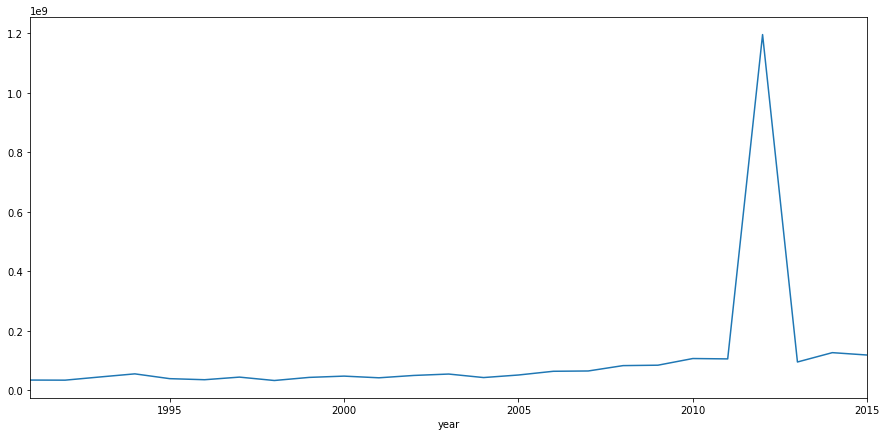

In [40]:
fig, ax = plt.subplots(figsize=(15,7))
group2.sum().plot(ax= ax)

### 총 국가간 커피 수출량 (자국소비 제외)

In [8]:
q = f[['year','TradeQuantity']]

In [11]:
group1=q['TradeQuantity'].groupby(q['year'])

In [22]:
q

,year,TradeQuantity
0,1991,0
1,1992,0
2,1993,0
3,1994,0
4,1995,0
...,...,...
864895,2011,0
864896,2012,0
864897,2013,0
864898,2014,0


In [26]:
q[(q['year']==2012)&(q['TradeQuantity'].notnull())]

,year,TradeQuantity
21,2012,0
46,2012,0
71,2012,0
96,2012,0
121,2012,0
...,...,...
864796,2012,0
864821,2012,0
864846,2012,0
864871,2012,0


In [17]:
group1.size()

year
1991    34596
1992    34596
1993    34596
1994    34596
1995    34596
1996    34596
1997    34596
1998    34596
1999    34596
2000    34596
2001    34596
2002    34596
2003    34596
2004    34596
2005    34596
2006    34596
2007    34596
2008    34596
2009    34596
2010    34596
2011    34596
2012    34596
2013    34596
2014    34596
2015    34596
Name: TradeQuantity, dtype: int64

In [27]:
group1.sum()

year
1991     2650061728
1992     2862347403
1993     2822515712
1994     3146613981
1995     3259891837
1996     3679836697
1997     3904968945
1998     3692119860
1999     3883684117
2000     4612117836
2001     4284960437
2002     4562477217
2003     4369478250
2004     4593779951
2005     4328264747
2006     4957294203
2007     5505313572
2008     4946795800
2009     5551137424
2010     5634714214
2011     5772645968
2012    11384307892
2013     5877202059
2014     6480005684
2015     6380224616
Name: TradeQuantity, dtype: int64

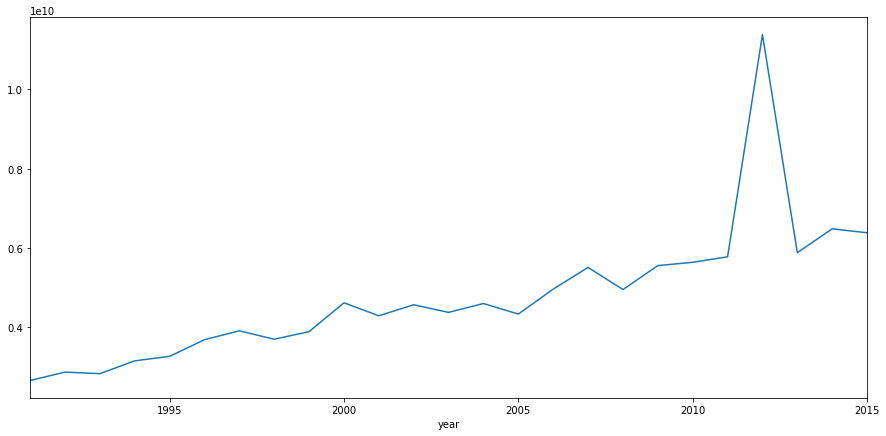

In [15]:
fig, ax = plt.subplots(figsize=(15,7))
group1.sum().plot(ax= ax)

### 최근 5년 수출량의 상위 5개국

In [65]:
topExp = f[f['year'].isin([2011,2012,2013,2014,2015])]

In [66]:
group3 = topExp['TradeQuantity'].groupby(topExp['exporter_name'])

In [75]:
from itertools import cycle, islice

In [77]:
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(group3)))

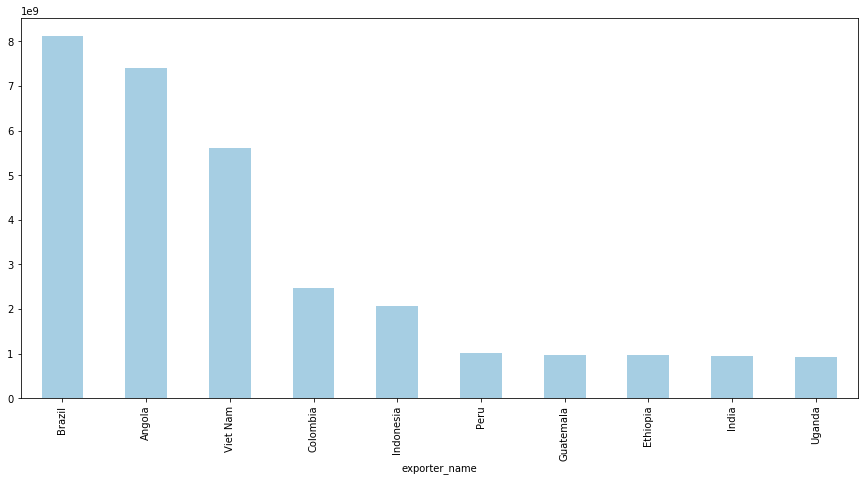

In [84]:
fig, ax = plt.subplots(figsize=(15,7))
group3.sum().sort_values(ascending=False)[:10].plot.bar(ax=ax,colormap='Paired')

### 최근 5년 수입량의 상위 5개국

In [62]:
topImp = f[f['year'].isin([2011,2012,2013,2014,2015])]

In [63]:
group4 = topImp['TradeQuantity'].groupby(topExp['importer_name'])

In [72]:
group4.sum().sort_values(ascending=False)[:10]

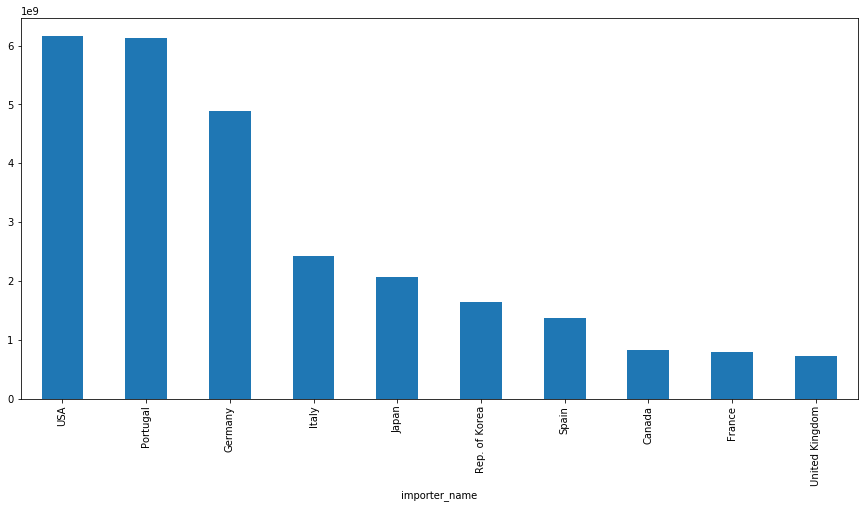

In [71]:
fig, ax = plt.subplots(figsize=(15,7))
group4.sum().sort_values(ascending=False)[:10].plot.bar(ax=ax)